In [1]:
import xarray as xr
import matplotlib.pylab as plt
import numpy as np
import matplotlib
import seaborn as sns 
from scipy.stats import norm
import matplotlib.dates as mpl_dates

In [31]:
matplotlib.rc('figure', figsize=(15, 10))

In [3]:
##each of the 3IFS runs (2.8km.4km,9km) is stored in one zarr
ds_ifs = xr.open_zarr('/work/bm1235/a270046/cycle2-sync/ddh_output/4km')

In [4]:
##each of the ICON runs (2.8km.4km,9km) is stored in one zarr
ds_icon = xr.open_zarr('/work/bm1235/k203123/experiments/ngc2009/outdata/ngc2009_mtgrm.zarr')

In [5]:
MIN_LEVEL_icon = 85
MIN_LEVEL_ifs = 125

In [35]:
wind_speed_icon = (ds_icon.v**2 + ds_icon.u**2)**0.5
wind_speed_ifs = (ds_ifs.v**2 + ds_ifs.u**2)**0.5

In [36]:
wind_speed_icon_cabauw = wind_speed_icon.sel(level=slice(MIN_LEVEL_icon, None)).isel(station=12).mean(dim="time")
wind_speed_ifs_cabauw = wind_speed_ifs.sel(level=slice(MIN_LEVEL_ifs, None)).isel(station=11).mean(dim='time')

In [37]:
wind_speed_icon_fin = wind_speed_icon.sel(level=slice(MIN_LEVEL_icon, None)).isel(station=13).mean(dim="time")
wind_speed_ifs_fin = wind_speed_ifs.sel(level=slice(MIN_LEVEL_ifs, None)).isel(station=12).mean(dim='time')

In [38]:
wind_speed_icon_amer = wind_speed_icon.sel(level=slice(MIN_LEVEL_icon, None)).isel(station=14).mean(dim="time")
wind_speed_ifs_amer = wind_speed_ifs.sel(level=slice(MIN_LEVEL_ifs, None)).isel(station=13).mean(dim='time')

In [39]:
wind_speed_icon_ant = wind_speed_icon.sel(level=slice(MIN_LEVEL_icon, None)).isel(station=17).mean(dim="time")
wind_speed_ifs_ant = wind_speed_ifs.sel(level=slice(MIN_LEVEL_ifs, None)).isel(station=17).mean(dim='time')

In [40]:
wind_speed_icon_swiss = wind_speed_icon.sel(level=slice(MIN_LEVEL_icon, None)).isel(station=18).mean(dim="time")
wind_speed_ifs_swiss = wind_speed_ifs.sel(level=slice(MIN_LEVEL_ifs, None)).isel(station=18).mean(dim='time')

In [41]:
wind_speed_icon_ger = wind_speed_icon.sel(level=slice(MIN_LEVEL_icon, None)).isel(station=11).mean(dim="time")
wind_speed_ifs_ger = wind_speed_ifs.sel(level=slice(MIN_LEVEL_ifs, None)).isel(station=14).mean(dim='time')

In [42]:
wind_speed_icon_barr = wind_speed_icon.sel(level=slice(MIN_LEVEL_icon, None)).isel(station=15).mean(dim="time")
wind_speed_ifs_barr = wind_speed_ifs.sel(level=slice(MIN_LEVEL_ifs, None)).isel(station=15).mean(dim='time')

In [43]:
wind_speed_icon_den = wind_speed_icon.sel(level=slice(MIN_LEVEL_icon, None)).isel(station=16).mean(dim="time")
wind_speed_ifs_den = wind_speed_ifs.sel(level=slice(MIN_LEVEL_ifs, None)).isel(station=16).mean(dim='time')

In [44]:
wind_speed_ifs_den

<xarray.DataArray (level: 13)>
dask.array<mean_agg-aggregate, shape=(13,), dtype=float64, chunksize=(13,), chunktype=numpy.ndarray>
Coordinates:
  * level         (level) int32 125 126 127 128 129 130 ... 133 134 135 136 137
    station       int64 17
    station_name  <U26 dask.array<chunksize=(), meta=np.ndarray>

In [45]:
#wind_speed_ex_icon_try = wind_speed_ex_icon.resample(time='M').mean()
#x = wind_speed_ex_icon_try.mean(dim="level")
#wind_speed_ex_icon_try
#x

In [17]:
#time = time.apply(mpl_dates.date2num)
#x= x.astype(float)

In [18]:
import dask as da

In [19]:
from dask.diagnostics import ProgressBar

In [20]:
with ProgressBar():
    wind_speed_ex_icon.compute()

NameError: name 'wind_speed_ex_icon' is not defined

In [22]:
wind_speed.resample()

NameError: name 'wind_speed' is not defined

In [46]:
# Constants
R = 287
g = 9.81

In [47]:
air_pressure_at_surface_ifs = ds_ifs.p.isel(level=-1)

In [48]:
height_icon = ds_icon['level_height']

In [49]:
height_icon = height_icon.sel(level=slice(MIN_LEVEL_icon, None),station=wind_speed_icon_cabauw.station)

In [50]:
height_ifs = R * ds_ifs.t * np.log(air_pressure_at_surface_ifs / ds_ifs.p) / g
height_ifs = height_ifs.sel(level=slice(MIN_LEVEL_ifs, None))
#wind_speed_ex_icon.station.load()

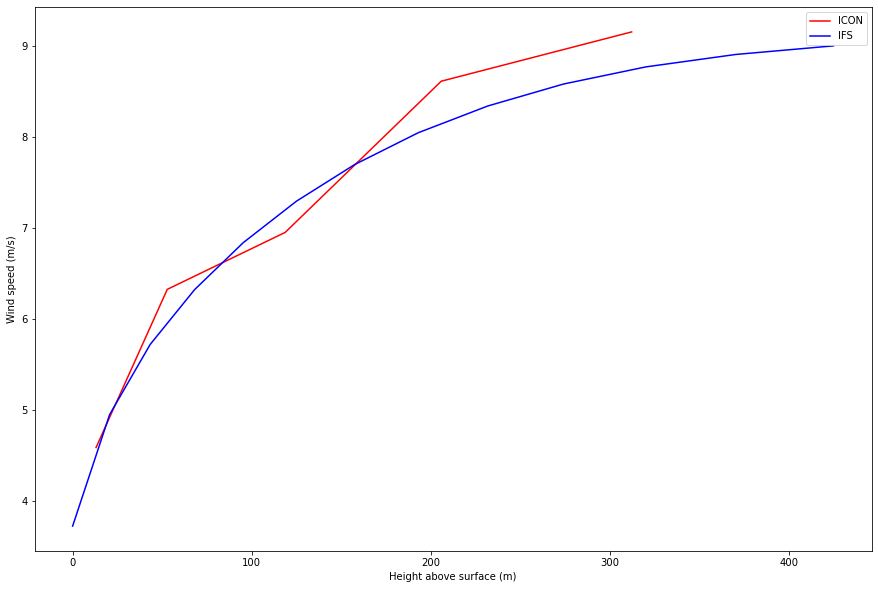

In [51]:
plt.plot(height_icon, wind_speed_icon_cabauw, label = 'ICON' , c = 'r')

plt.plot(height_ifs.sel(station=wind_speed_ifs_cabauw.station).mean(dim="time"),
         wind_speed_ifs_cabauw, label = 'IFS', c = 'b')
plt.legend()
plt.ylabel('Wind speed (m/s)')
plt.xlabel('Height above surface (m)');

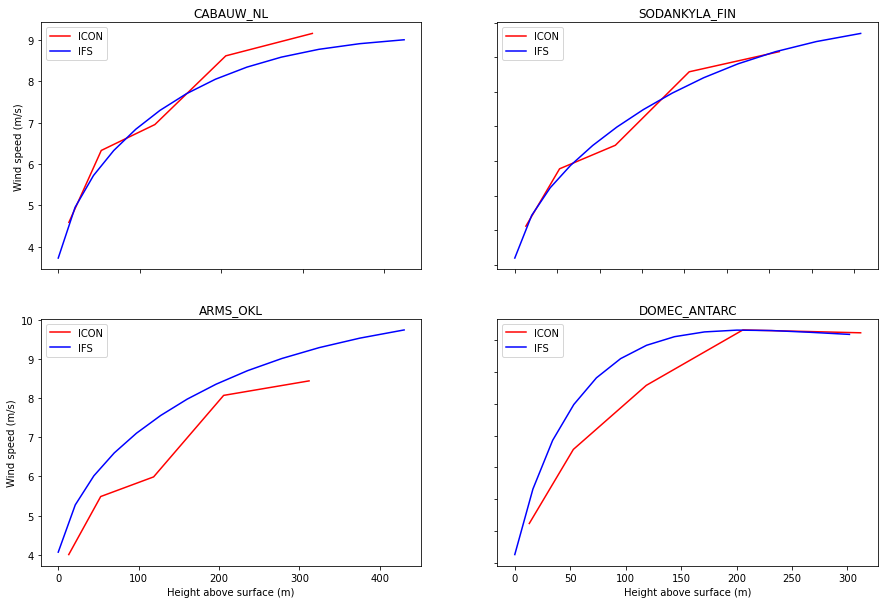

In [52]:
fig, axs = plt.subplots(2, 2)
axs[0, 0].plot(height_icon, wind_speed_icon_cabauw, label = 'ICON' , c = 'r')

axs[0, 0].plot(height_ifs.sel(station=wind_speed_ifs_cabauw.station).mean(dim="time"),
         wind_speed_ifs_cabauw, label = 'IFS', c = 'b')
axs[0, 0].legend()
axs[0, 0].set_title('CABAUW_NL')
axs[0, 1].plot(height_icon, wind_speed_icon_fin, label = 'ICON' , c = 'r')

axs[0, 1].plot(height_ifs.sel(station=wind_speed_ifs_fin.station).mean(dim="time"),
         wind_speed_ifs_fin, label = 'IFS', c = 'b')
axs[0, 1].legend()
axs[0, 1].set_title('SODANKYLA_FIN')
axs[1, 0].plot(height_icon, wind_speed_icon_amer, label = 'ICON' , c = 'r')

axs[1, 0].plot(height_ifs.sel(station=wind_speed_ifs_amer.station).mean(dim="time"),
         wind_speed_ifs_amer, label = 'IFS', c = 'b')
axs[1, 0].set_title('ARMS_OKL')
axs[1, 0].legend()
axs[1, 1].plot(height_icon, wind_speed_icon_ant, label = 'ICON' , c = 'r')

axs[1, 1].plot(height_ifs.sel(station=wind_speed_ifs_ant.station).mean(dim="time"),
         wind_speed_ifs_ant, label = 'IFS', c = 'b')
axs[1, 1].set_title('DOMEC_ANTARC')
axs[1, 1].legend()
for ax in axs.flat:
    ax.set(xlabel='Height above surface (m)', ylabel='Wind speed (m/s)')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()


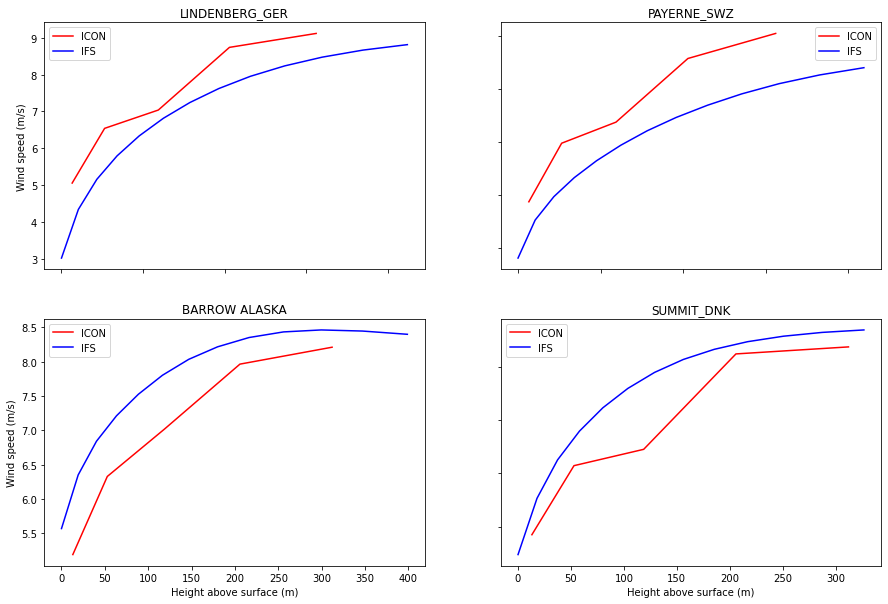

In [53]:
fig, axs = plt.subplots(2, 2)
axs[0, 0].plot(height_icon, wind_speed_icon_ger, label = 'ICON' , c = 'r')

axs[0, 0].plot(height_ifs.sel(station=wind_speed_ifs_ger.station).mean(dim="time"),
         wind_speed_ifs_ger, label = 'IFS', c = 'b')
axs[0, 0].legend()
axs[0, 0].set_title('LINDENBERG_GER')
axs[0, 1].plot(height_icon, wind_speed_icon_swiss, label = 'ICON' , c = 'r')

axs[0, 1].plot(height_ifs.sel(station=wind_speed_ifs_swiss.station).mean(dim="time"),
         wind_speed_ifs_swiss, label = 'IFS', c = 'b')
axs[0, 1].legend()
axs[0, 1].set_title('PAYERNE_SWZ')
axs[1, 0].plot(height_icon, wind_speed_icon_barr, label = 'ICON' , c = 'r')

axs[1, 0].plot(height_ifs.sel(station=wind_speed_ifs_barr.station).mean(dim="time"),
         wind_speed_ifs_barr, label = 'IFS', c = 'b')
axs[1, 0].set_title('BARROW ALASKA')
axs[1, 0].legend()
axs[1, 1].plot(height_icon, wind_speed_icon_den, label = 'ICON' , c = 'r')

axs[1, 1].plot(height_ifs.sel(station=wind_speed_ifs_den.station).mean(dim="time"),
         wind_speed_ifs_den, label = 'IFS', c = 'b')
axs[1, 1].set_title('SUMMIT_DNK')
axs[1, 1].legend()
for ax in axs.flat:
    ax.set(xlabel='Height above surface (m)', ylabel='Wind speed (m/s)')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()


In [66]:
speed_icon_all = wind_speed_icon.sel(level=slice(MIN_LEVEL_icon, None)).isel(station=12)
speed_icon_all.time

<xarray.DataArray 'time' (time: 555120)>
array(['2020-01-20T00:02:00.000000000', '2020-01-20T00:04:00.000000000',
       '2020-01-20T00:06:00.000000000', ..., '2022-02-28T23:56:00.000000000',
       '2022-02-28T23:58:00.000000000', '2022-03-01T00:00:00.000000000'],
      dtype='datetime64[ns]')
Coordinates:
    blk      int32 dask.array<chunksize=(), meta=np.ndarray>
    dx       int32 dask.array<chunksize=(), meta=np.ndarray>
    lat      float64 dask.array<chunksize=(), meta=np.ndarray>
    lon      float64 dask.array<chunksize=(), meta=np.ndarray>
    station  <U44 'Cabauw'
  * time     (time) datetime64[ns] 2020-01-20T00:02:00 ... 2022-03-01
Attributes:
    axis:     T

In [65]:
speed_icon_all

<xarray.DataArray (time: 555120, level: 5)>
dask.array<getitem, shape=(555120, 5), dtype=float64, chunksize=(10800, 5), chunktype=numpy.ndarray>
Coordinates:
    blk           int32 dask.array<chunksize=(), meta=np.ndarray>
    dx            int32 dask.array<chunksize=(), meta=np.ndarray>
    lat           float64 dask.array<chunksize=(), meta=np.ndarray>
    level_height  (level) float64 dask.array<chunksize=(5,), meta=np.ndarray>
    lon           float64 dask.array<chunksize=(), meta=np.ndarray>
    station       <U44 'Cabauw'
  * time          (time) datetime64[ns] 2020-01-20T00:02:00 ... 2022-03-01
Dimensions without coordinates: level

In [63]:
speed_monthly_icon = speed_icon_all.resample(time="M")
speed_monthly_icon

DataArrayResample, grouped over '__resample_dim__'
27 groups with labels 2020-01-31, ..., 2022-03-31.

In [71]:
speed_icon_all.sel('time')

ValueError: the first argument to .sel must be a dictionary

TypeError: operand type(s) all returned NotImplemented from __array_ufunc__(<ufunc 'less_equal'>, '__call__', array('2020-01-31T00:00:00.000000000', dtype='datetime64[ns]'), dask.array<getitem, shape=(8639, 5), dtype=float64, chunksize=(8639, 5), chunktype=numpy.ndarray>): 'ndarray', 'Array'

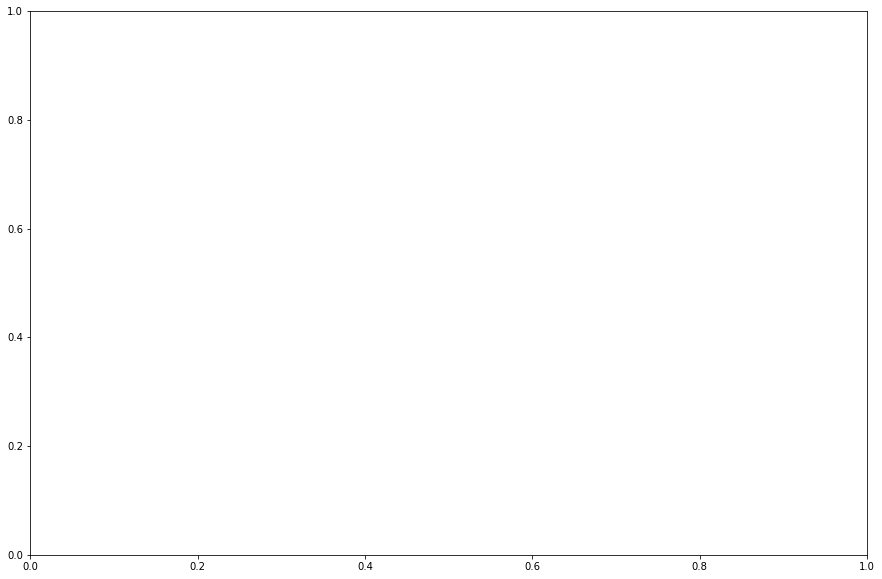

In [62]:
 plt.violinplot(speed_monthly_icon)